# Import Libraries

In [100]:
# Data manipulation
import pandas as pd

# Static visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive visualizations
import plotly.express as px


# Load and Inspect Data

In [103]:
# Load the sales dataset
df = pd.read_excel('amazon_sales_dataset_2019_2024.xlsx')

In [104]:
# Display the first few rows
df.head()

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78


In [107]:
# Display basic info to understand data types and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          5000 non-null   object        
 1   Order Date        5000 non-null   datetime64[ns]
 2   Customer ID       5000 non-null   object        
 3   Customer Name     5000 non-null   object        
 4   Region            5000 non-null   object        
 5   Product Category  5000 non-null   object        
 6   Product Name      4999 non-null   object        
 7   Quantity Sold     5000 non-null   int64         
 8   Unit Price        5000 non-null   float64       
 9   Discount (%)      5000 non-null   float64       
 10  Salesperson       5000 non-null   object        
 11  Payment Method    5000 non-null   object        
 12  Order Status      5000 non-null   object        
 13  Total Sales       5000 non-null   float64       
 14  Profit Margin     5000 n

In [109]:
# Summary statistics of numeric columns
df.describe()

,Order Date,Quantity Sold,Unit Price,Discount (%),Total Sales,Profit Margin
count,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2022-01-02 09:26:12.480000,5.518800,255.161728,14.899920,1187.145384,413.072520
min,2019-01-01 00:00:00,1.000000,5.160000,0.000000,4.610000,1.600000
25%,2020-07-03 00:00:00,3.000000,130.112500,7.237500,370.127500,128.787500
50%,2022-01-08 00:00:00,6.000000,257.080000,14.870000,907.955000,315.930000
75%,2023-06-21 06:00:00,8.000000,379.710000,22.442500,1762.252500,613.180000
max,2024-12-31 00:00:00,10.000000,499.910000,29.990000,4911.920000,1709.120000
std,NaN,2.896088,143.167691,8.705621,988.464586,343.940683


# Data Preprocessing

In [112]:
# Create new time-based columns for easier grouping
df["Month"] = df["Order Date"].dt.to_period("M")
df["Year"] = df["Order Date"].dt.year

In [114]:
# Check for missing values
df.isnull().sum()

Order ID            0
Order Date          0
Customer ID         0
Customer Name       0
Region              0
Product Category    0
Product Name        1
Quantity Sold       0
Unit Price          0
Discount (%)        0
Salesperson         0
Payment Method      0
Order Status        0
Total Sales         0
Profit Margin       0
Month               0
Year                0
dtype: int64

In [116]:
# Drop rows with missing values
df.dropna(inplace=True)

In [118]:
# Calculate total sales for each row by multiplying quantity sold by unit price
df["Total"] = df["Quantity Sold"] * df["Unit Price"]

In [120]:
# Display the first few rows
df.head()

,Order ID,Order Date,Customer ID,Customer Name,Region,Product Category,Product Name,Quantity Sold,Unit Price,Discount (%),Salesperson,Payment Method,Order Status,Total Sales,Profit Margin,Month,Year,Total
0,576ca8db-ad1a-4aa8-9c3a-89102555f200,2019-01-01,48aa940a-5cb5-4103-8d89-19c10fd26aaf,Stephanie Garcia,South America,Home & Kitchen,Speak,9,484.46,21.33,Johnny Marshall,Debit Card,Returned,3430.12,1193.53,2019-01,2019,4360.14
1,b7154d7e-f369-4a81-80b1-d36b23cc0420,2019-01-01,8de3545c-78e6-4962-ace5-02e37fe1ce91,Jacob Morales,South America,Books,If,10,179.28,6.43,Bradley Howe,Gift Card,Pending,1677.52,583.70,2019-01,2019,1792.80
2,b2852522-fbaa-43fa-b165-bd10e0035591,2019-01-02,6ac41f61-acf6-4e46-8b70-ad00ce01c9d0,John Carroll,North America,Sports,Big,6,185.34,1.57,Johnny Marshall,Amazon Pay,Completed,1094.58,380.86,2019-01,2019,1112.04
3,f14eae78-235f-4283-a2cc-6433fd861c14,2019-01-04,04bb6a6a-a62a-4e79-a038-68758f215ccc,Allison Ramirez,Asia,Home & Kitchen,Serious,5,40.98,4.21,Roger Brown,PayPal,Completed,196.27,68.29,2019-01,2019,204.90
4,c3fcb6f0-a399-47eb-8903-2a354425ea75,2019-01-04,2267ce03-37ba-446a-b279-17ecee550c6e,James Thompson,North America,Toys,Operation,10,459.39,20.50,Kristen Ramos,PayPal,Cancelled,3652.15,1270.78,2019-01,2019,4593.90


In [122]:
# Display basic info to understand data types and nulls
df.info()

# Convert 'Order Date' column to datetime format for easier date-based operations
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Convert 'Discount (%)' column to float type to enable numerical calculations
df['Discount (%)'] = df['Discount (%)'].astype(float)

# Convert 'Total Sales' column to float type to ensure accurate numerical operations
df['Total Sales'] = df['Total Sales'].astype(float)

# Convert 'Profit Margin' column to float type for further analysis or calculations
df['Profit Margin'] = df['Profit Margin'].astype(float)


<class 'pandas.core.frame.DataFrame'>
Index: 4999 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          4999 non-null   object        
 1   Order Date        4999 non-null   datetime64[ns]
 2   Customer ID       4999 non-null   object        
 3   Customer Name     4999 non-null   object        
 4   Region            4999 non-null   object        
 5   Product Category  4999 non-null   object        
 6   Product Name      4999 non-null   object        
 7   Quantity Sold     4999 non-null   int64         
 8   Unit Price        4999 non-null   float64       
 9   Discount (%)      4999 non-null   float64       
 10  Salesperson       4999 non-null   object        
 11  Payment Method    4999 non-null   object        
 12  Order Status      4999 non-null   object        
 13  Total Sales       4999 non-null   float64       
 14  Profit Margin     4999 non-nu

# Descriptive Statistics

In [125]:
# Generate descriptive statistics for all columns
df.describe(include='all')

# Count the number of occurrences for each unique value in the 'Region' column
df['Region'].value_counts()

# Count the number of occurrences for each unique value in the 'Order Status' column
df['Order Status'].value_counts()


Order Status
Returned     1325
Completed    1231
Pending      1227
Cancelled    1216
Name: count, dtype: int64

# Total Sales and Profit by Region

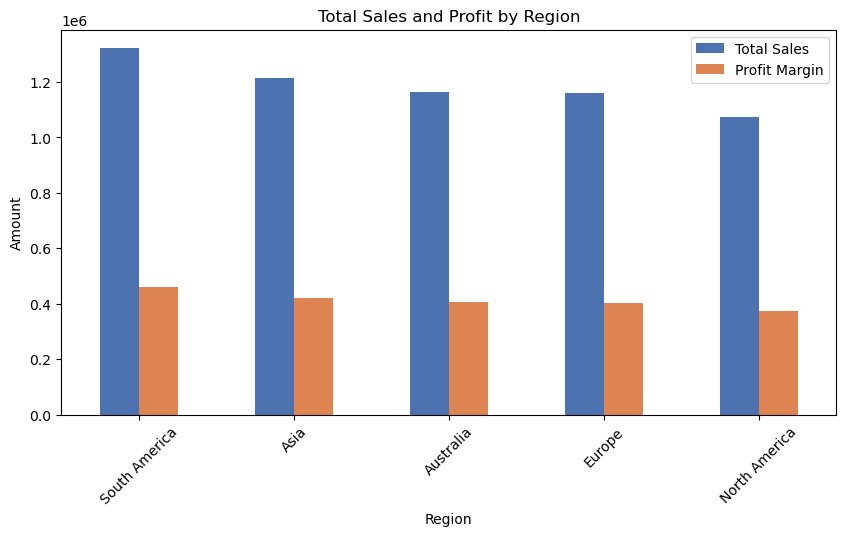

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by Region and calculate total sales and profit margin for each
region_sales = df.groupby('Region')[['Total Sales', 'Profit Margin']].sum()

# Sort regions by total sales in descending order
region_sales = region_sales.sort_values('Total Sales', ascending=False)

# Create a bar chart to show total sales and profit by region
# Set a custom color palette i.e 'deep' 
region_sales.plot(kind='bar', figsize=(10, 5), title='Total Sales and Profit by Region', color=sns.color_palette('deep'))

# Label the y-axis
plt.ylabel('Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Sales Over Time

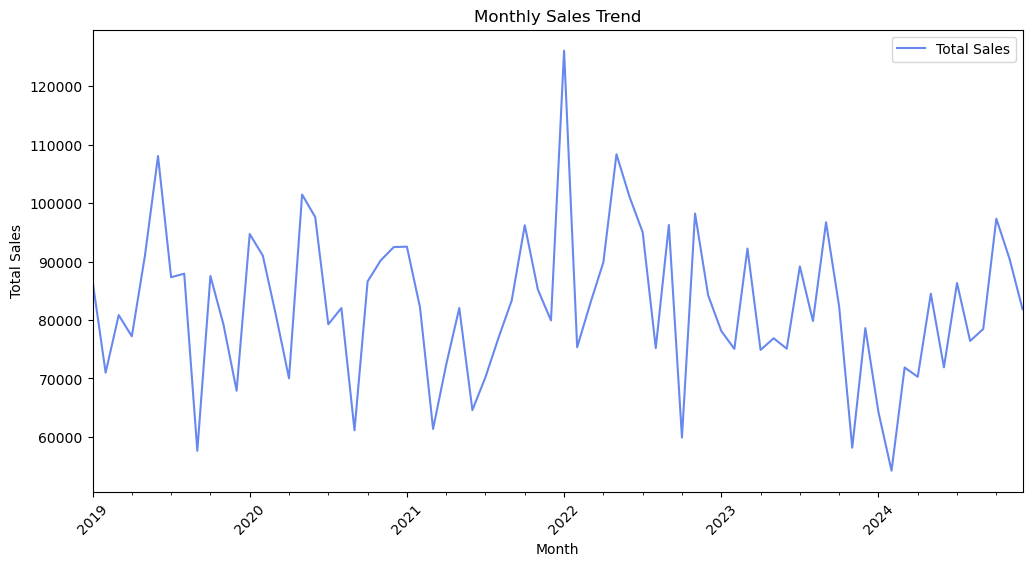

In [131]:
# Group the data by month, summing the total sales for each month
monthly_sales = df.groupby(df['Order Date'].dt.to_period('M'))[['Total Sales']].sum()

# Plot the total sales trend over time (monthly)
monthly_sales.plot(title='Monthly Sales Trend', figsize=(12, 6))

# Label the y-axis with 'Total Sales'
plt.ylabel('Total Sales')

# Label the x-axis with 'Month'
plt.xlabel('Month')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


# Discount vs Profit Margin

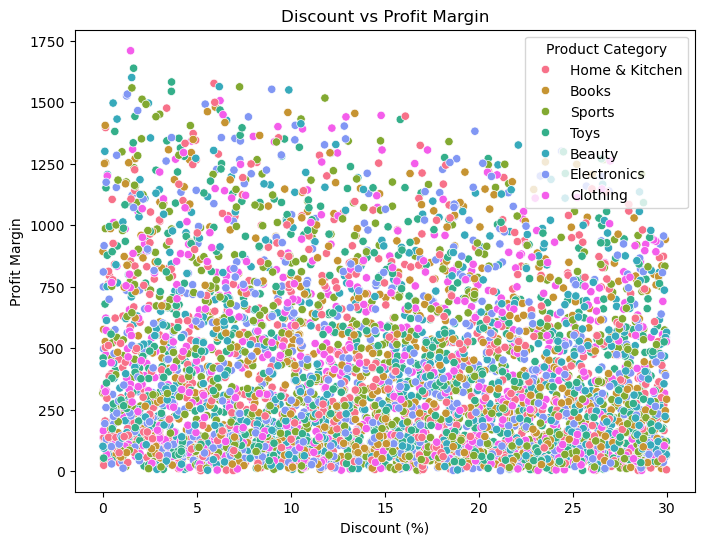

In [134]:
# Set the size of the plot
plt.figure(figsize=(8, 6))

# Set the color palette to 'coolwarm' for better accessibility
sns.set_palette('coolwarm')

# Create a scatter plot to show the relationship between discount and profit margin,
# colored by product category for better comparison
sns.scatterplot(data=df, x='Discount (%)', y='Profit Margin', hue='Product Category')

# Add a title to the plot
plt.title('Discount vs Profit Margin')

# Display the plot
plt.show()


# Top Salespersons

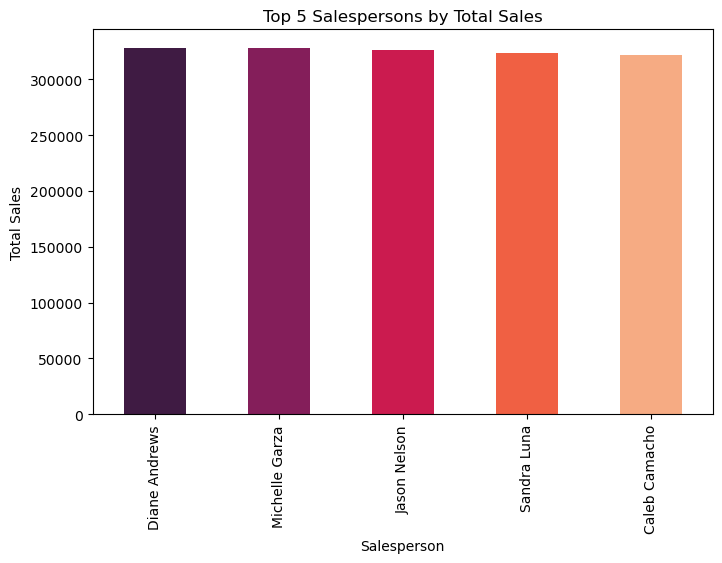

In [137]:
# Group the data by Salesperson and calculate total sales
top_salespersons = df.groupby('Salesperson')['Total Sales'].sum()

# Sort and get the top 5 salespersons
top_salespersons = top_salespersons.sort_values(ascending=False).head(5)

# Create a bar chart with a rocket color palette
colors = sns.color_palette("rocket", len(top_salespersons))
top_salespersons.plot(kind='bar', title='Top 5 Salespersons by Total Sales', figsize=(8, 5), color=colors)

# Label the y-axis
plt.ylabel('Total Sales')

# Show the plot
plt.show()


# Order Status Impact

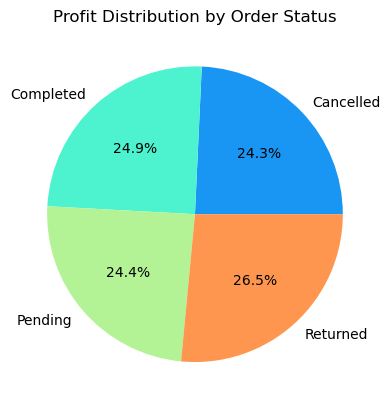

In [140]:
# Group the data by 'Order Status' and calculate the total profit margin for each status
status_profit = df.groupby('Order Status')['Profit Margin'].sum()

# Create a pie chart with a rainbow color palette
colors = sns.color_palette("rainbow", len(status_profit))  # Apply the rocket color palette
status_profit.plot(kind='pie', autopct='%1.1f%%', title='Profit Distribution by Order Status', colors=colors)

# Remove the y-axis label for cleaner presentation
plt.ylabel('')

# Display the pie chart
plt.show()


# Save Cleaned Data

In [146]:
 df.to_csv("cleaned_sales_data.csv", index=False)